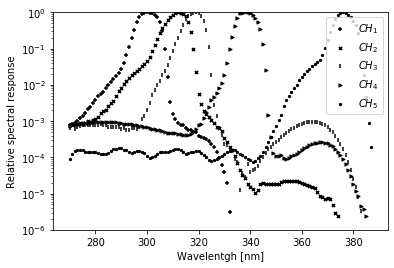

In [2]:
#Relative spectral response function of NILU-UV 115

import matplotlib.pyplot as plt
import numpy as np

l   = np.loadtxt('no4115.txt')[:, 0]  
ch1 = np.loadtxt('no4115.txt')[:, 1]
ch2 = np.loadtxt('no4115.txt')[:, 2]
ch3 = np.loadtxt('no4115.txt')[:, 3]
ch4 = np.loadtxt('no4115.txt')[:, 4]
ch5 = np.loadtxt('no4115.txt')[:, 5]


plt.xlabel("Wavelentgh [nm]")
plt.ylabel("Relative spectral response")  

plt.yscale('log')
plt.ylim(10**-6,1)



plt.scatter(l, ch1, marker='+', color='black', s=10, label = '$CH_1$')
plt.scatter(l, ch2, marker='x', color='black', s=10, label = '$CH_2$')
plt.scatter(l, ch3, marker='|', color='black', s=10, label = '$CH_3$')
plt.scatter(l, ch4, marker='>', color='black', s=10, label = '$CH_4$')
plt.scatter(l, ch5, marker='.', color='black', s=20, label = '$CH_5$')
#plt.legend(loc='lower left')
legend = plt.legend()

#fig= plt.figure()



plt.savefig('relative_response.pdf', dpi = 300)
#plt.show()





1790685.8478628926 5552086.984912997 2347963.3734438145 1702754.6220449156 277330.9263312989
3279651.2889589993 8366032.011103023 3208621.90585783 1772740.7074484942 246427.25473089993
3018542433295.0967 68341898827.79944


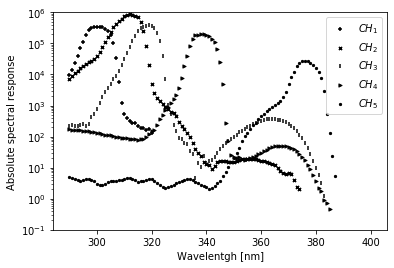

In [3]:
# Absolute response function of NILU-UV 115
import pandas as pd

df = pd.read_csv('/Users/milos/Aerosol-Optics/NILU-UV/Spectral_Response/defaultOutput/cosine_irradiance_total_downward.txt')

# Extracting TOA total cosine downward irradiance from dataframe

#reading line 4 of dataframe
FTOA = df.loc[4]

#split the one string to elements
E  = FTOA[0].split()

#convert the string elements to float list. Irradiances are between 270-387 nm with 1 nm resolution.
F=[]
for i in E:
    F.append(float(i))


#Extracting the corresponding wavelengths from the AccuRT file.    
wavelength_raw = df.loc[3]
wavelength_split = wavelength_raw[0].split()
wavelength = []
for i in wavelength_split:
    wavelength.append(float(i))

#The absolute response is from 290 nm. --> erasing the first 20 irradiances.

Fa=F[20::]
    
    
# Absolute Response Files
l_a   = np.loadtxt('Absolute_Response/absresp115-03062010-ch1.txt')[:, 0]  #wavelength array
ch1_a = np.loadtxt('Absolute_Response/absresp115-03062010-ch1.txt')[:, 1]
ch2_a = np.loadtxt('Absolute_Response/absresp115-03062010-ch2.txt')[:, 1]
ch3_a = np.loadtxt('Absolute_Response/absresp115-03062010-ch3.txt')[:, 1]
ch4_a = np.loadtxt('Absolute_Response/absresp115-03062010-ch4.txt')[:, 1]
ch5_a = np.loadtxt('Absolute_Response/absresp115-03062010-ch5.txt')[:, 1]



#Filling the irradiance array with 0-s so we can multiply..
F1 = Fa+[0]*(len(ch1_a)-len(Fa))
F2 = Fa+[0]*(len(ch2_a)-len(Fa))
F3 = Fa+[0]*(len(ch3_a)-len(Fa))
F4 = Fa+[0]*(len(ch4_a)-len(Fa))
F5 = Fa+[0]*(len(ch5_a)-len(Fa))

# Let's calculate the a and b coefficients for the absolute response function.
Product1 = np.multiply(ch1_a,F1)
Product2 = np.multiply(ch2_a,F2)
Product3 = np.multiply(ch3_a,F3)
Product4 = np.multiply(ch4_a,F4)
Product5 = np.multiply(ch5_a,F5)

a1=sum(Product1)
a2=sum(Product2)
a3=sum(Product3)
a4=sum(Product4)
a5=sum(Product5)

b1=sum(ch1_a)
b2=sum(ch2_a)
b3=sum(ch3_a)
b4=sum(ch4_a)
b5=sum(ch5_a)

print(a1, a2, a3, a4, a5)
print(b1, b2, b3, b4, b5)


#Ploting the absolute response function
plt.xlabel("Wavelentgh [nm]")
plt.ylabel("Absolute spectral response")  

plt.yscale('log')
plt.ylim(10**-1,10**6)

plt.scatter(l_a, ch1_a, marker='+', color='black', s=10, label = '$CH_1$')
plt.scatter(l_a, ch2_a, marker='x', color='black', s=10, label = '$CH_2$')
plt.scatter(l_a, ch3_a, marker='|', color='black', s=10, label = '$CH_3$')
plt.scatter(l_a, ch4_a, marker='>', color='black', s=10, label = '$CH_4$')
plt.scatter(l_a, ch5_a, marker='.', color='black', s=20, label = '$CH_5$')
#plt.legend(loc='lower left')
legend = plt.legend()

#fig= plt.figure()
plt.savefig('absolute_response.pdf', dpi = 300)
#plt.show()

c4=a4*b4
c5=a5*b5

print(c4, c5)

In [4]:
# This following code is to check if the response function R' is normalized at the TOA
# We multiply irradiances at the TOA with the response.

#F1=[2.32407176e-01 2.25167526e-01 2.25262754e-01 2.23762374e-01 2.15079496e-01 1.99102981e-01 1.81903176e-01 1.82897406e-01 1.93734261e-01 2.07314289e-01 2.18033443e-01 2.13611369e-01 2.22996376e-01 2.35509511e-01 2.52164504e-01 2.93151857e-01 3.44916804e-01 3.80495709e-01 3.99742006e-01 4.22994509e-01 4.50672414e-01 4.94655717e-01 5.10477490e-01 5.31357200e-01 5.41198240e-01 5.46524990e-01 5.24661860e-01 5.16140590e-01 5.19258437e-01 5.28628227e-01 5.39623340e-01 5.40256362e-01 5.51477552e-01 5.61447582e-01 5.84344315e-01 5.80760580e-01 6.07561637e-01 6.31290242e-01 6.46452617e-01 6.55490885e-01 6.60498255e-01 6.66353430e-01 6.69833495e-01 6.86957047e-01 6.90061625e-01 7.10694927e-01 7.29773692e-01 7.25429817e-01 7.26230385e-01 7.21385850e-01 7.35674322e-01 7.63383010e-01 8.00660305e-01 8.13987767e-01 8.38042695e-01 8.79824152e-01 8.96296662e-01 9.27789432e-01 9.54298767e-01 9.78521165e-01 9.96354765e-01 1.00309337e+00 9.81160655e-01 9.72483497e-01 9.75646505e-01 9.60748170e-01 9.61146747e-01 9.55395605e-01 9.62395567e-01 9.70749057e-01 9.47828477e-01 9.48217240e-01 9.64231445e-01 9.67756400e-01 9.68739560e-01 9.59832285e-01 9.69940330e-01 9.75967070e-01 9.62820430e-01 9.71140112e-01 1.00920730e+00 1.01500595e+00 1.01263976e+00 1.00789836e+00 9.75614247e-01 9.97558900e-01 9.80723860e-01 9.69771052e-01 9.94427940e-01 9.81178130e-01 9.69127427e-01 9.89489755e-01 1.02300087e+00 1.05892021e+00 1.10526070e+00 1.12716323e+00 1.14207033e+00 1.18287358e+00 1.17316674e+00 1.16270091e+00 1.15164125e+00 1.14142443e+00 1.12679112e+00 1.13709115e+00 1.16266671e+00 1.13501327e+00 1.15372293e+00 1.13372843e+00 1.10697556e+00 1.09145696e+00 1.10781638e+00 1.09266090e+00 1.09086029e+00 1.05888891e+00 1.02071772e+00 1.04501739e+00 1.04089509e+00 1.06984603e+00]
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/milos/Aerosol-Optics/NILU-UV/Spectral_Response/defaultOutput/cosine_irradiance_total_downward.txt')
response1 = np.loadtxt('no4115.txt')[:, 1]
response2 = np.loadtxt('no4115.txt')[:, 2]
response3 = np.loadtxt('no4115.txt')[:, 3]
response4 = np.loadtxt('no4115.txt')[:, 4]
response5 = np.loadtxt('no4115.txt')[:, 5]


#reading line 4 of dataframe
FTOA = df.loc[4]

#split the one string to elements
E  = FTOA[0].split()

#convert the string elements to float list
F=[]
for i in E:
    F.append(float(i))


wavelength_raw = df.loc[3]
wavelength_split = wavelength_raw[0].split()
wavelength = []
for i in wavelength_split:
    wavelength.append(float(i))



#cleaning list of 'NaN'
response1 = [x for x in response1 if np.isnan(x) == False]
response2 = [x for x in response2 if np.isnan(x) == False]
response3 = [x for x in response3 if np.isnan(x) == False]
response4 = [x for x in response4 if np.isnan(x) == False]
response5 = [x for x in response5 if np.isnan(x) == False]

#multiplying the two lists:
F_1=F[:-55]
F_2=F[:-13]
F_3=F[:-4]
F_4=F[:-2]
F_5=F

Product1 = np.multiply(response1,F_1)
Product2 = np.multiply(response2,F_2)
Product3 = np.multiply(response3,F_3)
Product4 = np.multiply(response4,F_4)
Product5 = np.multiply(response5,F_5)


#Calculating the coefficients describe in the research plan version 7

a1=sum(Product1)
a2=sum(Product2)
a3=sum(Product3)
a4=sum(Product4)
a5=sum(Product5)

b1=sum(response1)
b2=sum(response2)
b3=sum(response3)
b4=sum(response4)
b5=sum(response5)

print(a1, a2, a3, a4, a5)
print(b1, b2, b3, b4, b5)

c4r=a4*b4
c5r=a5*b5

print(c4r,c5r)

5.1767139545572505 6.415165861017813 6.189701655836152 8.70482640414858 9.904771568125538
9.529695819 9.686854510000005 8.468276775000001 9.075614423000005 8.803237360000002
79.00164806320213 87.19405511078854


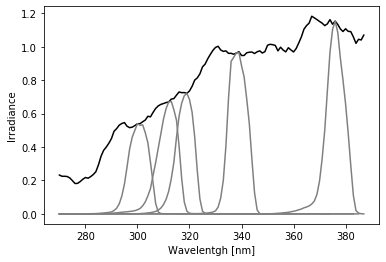

In [5]:
# I am going to plot F_TOA and F_TOA*Rel.Response. First run the previous block of codes.
import matplotlib.pyplot as plt
import numpy as np

plt.xlabel("Wavelentgh [nm]")
plt.ylabel('Irradiance' )  

plt.plot(wavelength, F, color = 'black', label='F')
plt.plot(wavelength[:-55], Product1, color='gray', label='$ch_1$')
plt.plot(wavelength[:-13], Product2, color='gray', label='$ch_2$')
plt.plot(wavelength[:-4],  Product3, color='gray', label='$ch_3$')
plt.plot(wavelength[:-2],  Product4, color='gray', label='$ch_4$')
plt.plot(wavelength,       Product5, color='gray', label='$ch_5$')



#legend = plt.legend()


plt.savefig('TOA_response.pdf', dpi = 300)


In [16]:
#Just some test calculations for the dates in NYC_AOD/RESULTS-REVISED.csv

c4 = 3018542433295.0967
c5 = 68341898827.79944

c4r= 79.00164806320213
c5r= 87.19405511078854

#ratio for 2010.08.28

r1 = (0.919*16652.6738)/(0.959*183225.625)*(9.204/1.659)*1.05

r4 = 9.204/(0.959*c4r)
r5 = 1.659/(0.919*c5r)

print(r1, r4, r5)

0.5073576235353887 0.1214847744117912 0.020703510878798594
